### Seaborn 与Matplotlib

#### 用matplotlib模拟随机游走

In [3]:
import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline
import numpy as np 
import pandas as pd

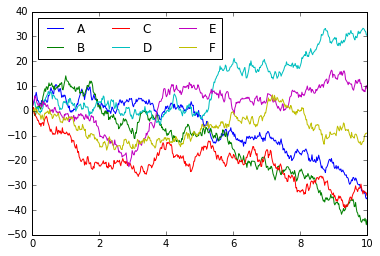

In [10]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x,y)
plt.legend('ABCDEF', ncol=3, loc='best')
plt.show()

#### 使用seaborn


In [11]:
import seaborn as sns
sns.set()

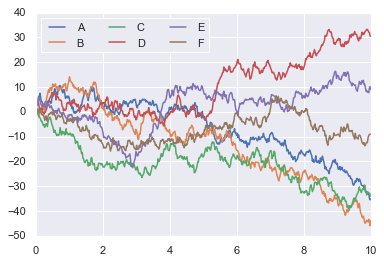

In [14]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='best')
plt.show()

### seaborn图形介绍

#### 频率直方图、kde和密度图

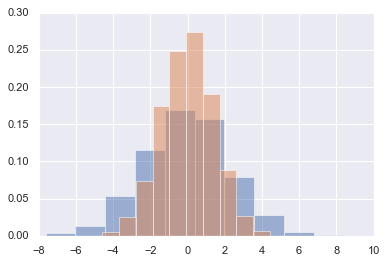

In [19]:
data = np.random.multivariate_normal([0, 0], [[5,2], [2,2]], size=3000)
data = pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

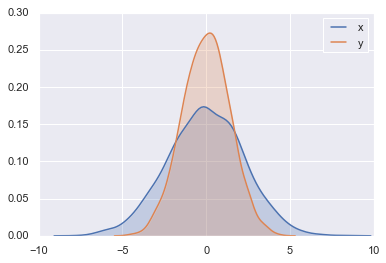

In [23]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

`distplot()`让频率直方图和KDE结合

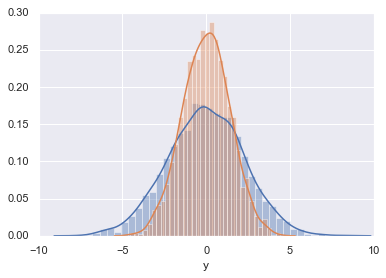

In [25]:
sns.distplot(data['x'])
sns.distplot(data['y'])


如果向`kdeplot`传入二维数据集，则可以绘制二维数据可视图

D:\anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


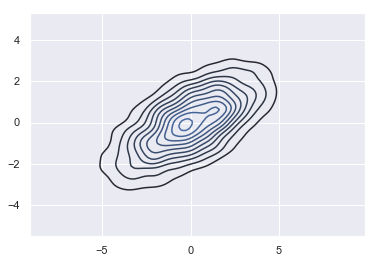

In [27]:
sns.kdeplot(data)
# sns.kdeplot(data['x'],data['y'])

`sns.jointplot`:可以绘制两个变量的分布图和联合分布图

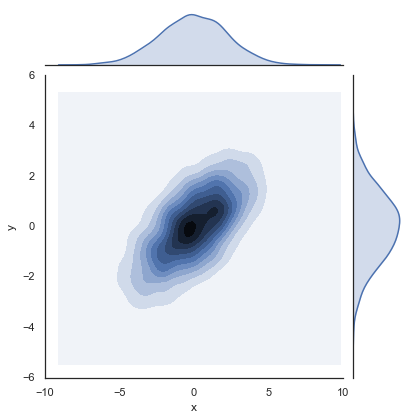

In [33]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

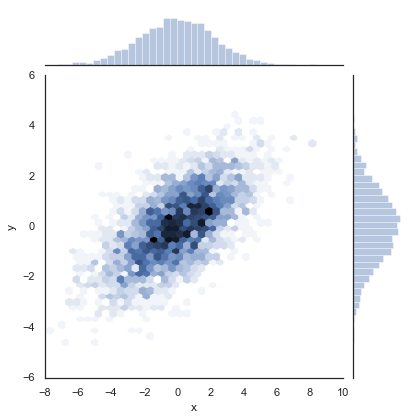

In [35]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

#### 矩阵图

In [40]:
plt.rcParams['figure.dpi'] = 200

In [36]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


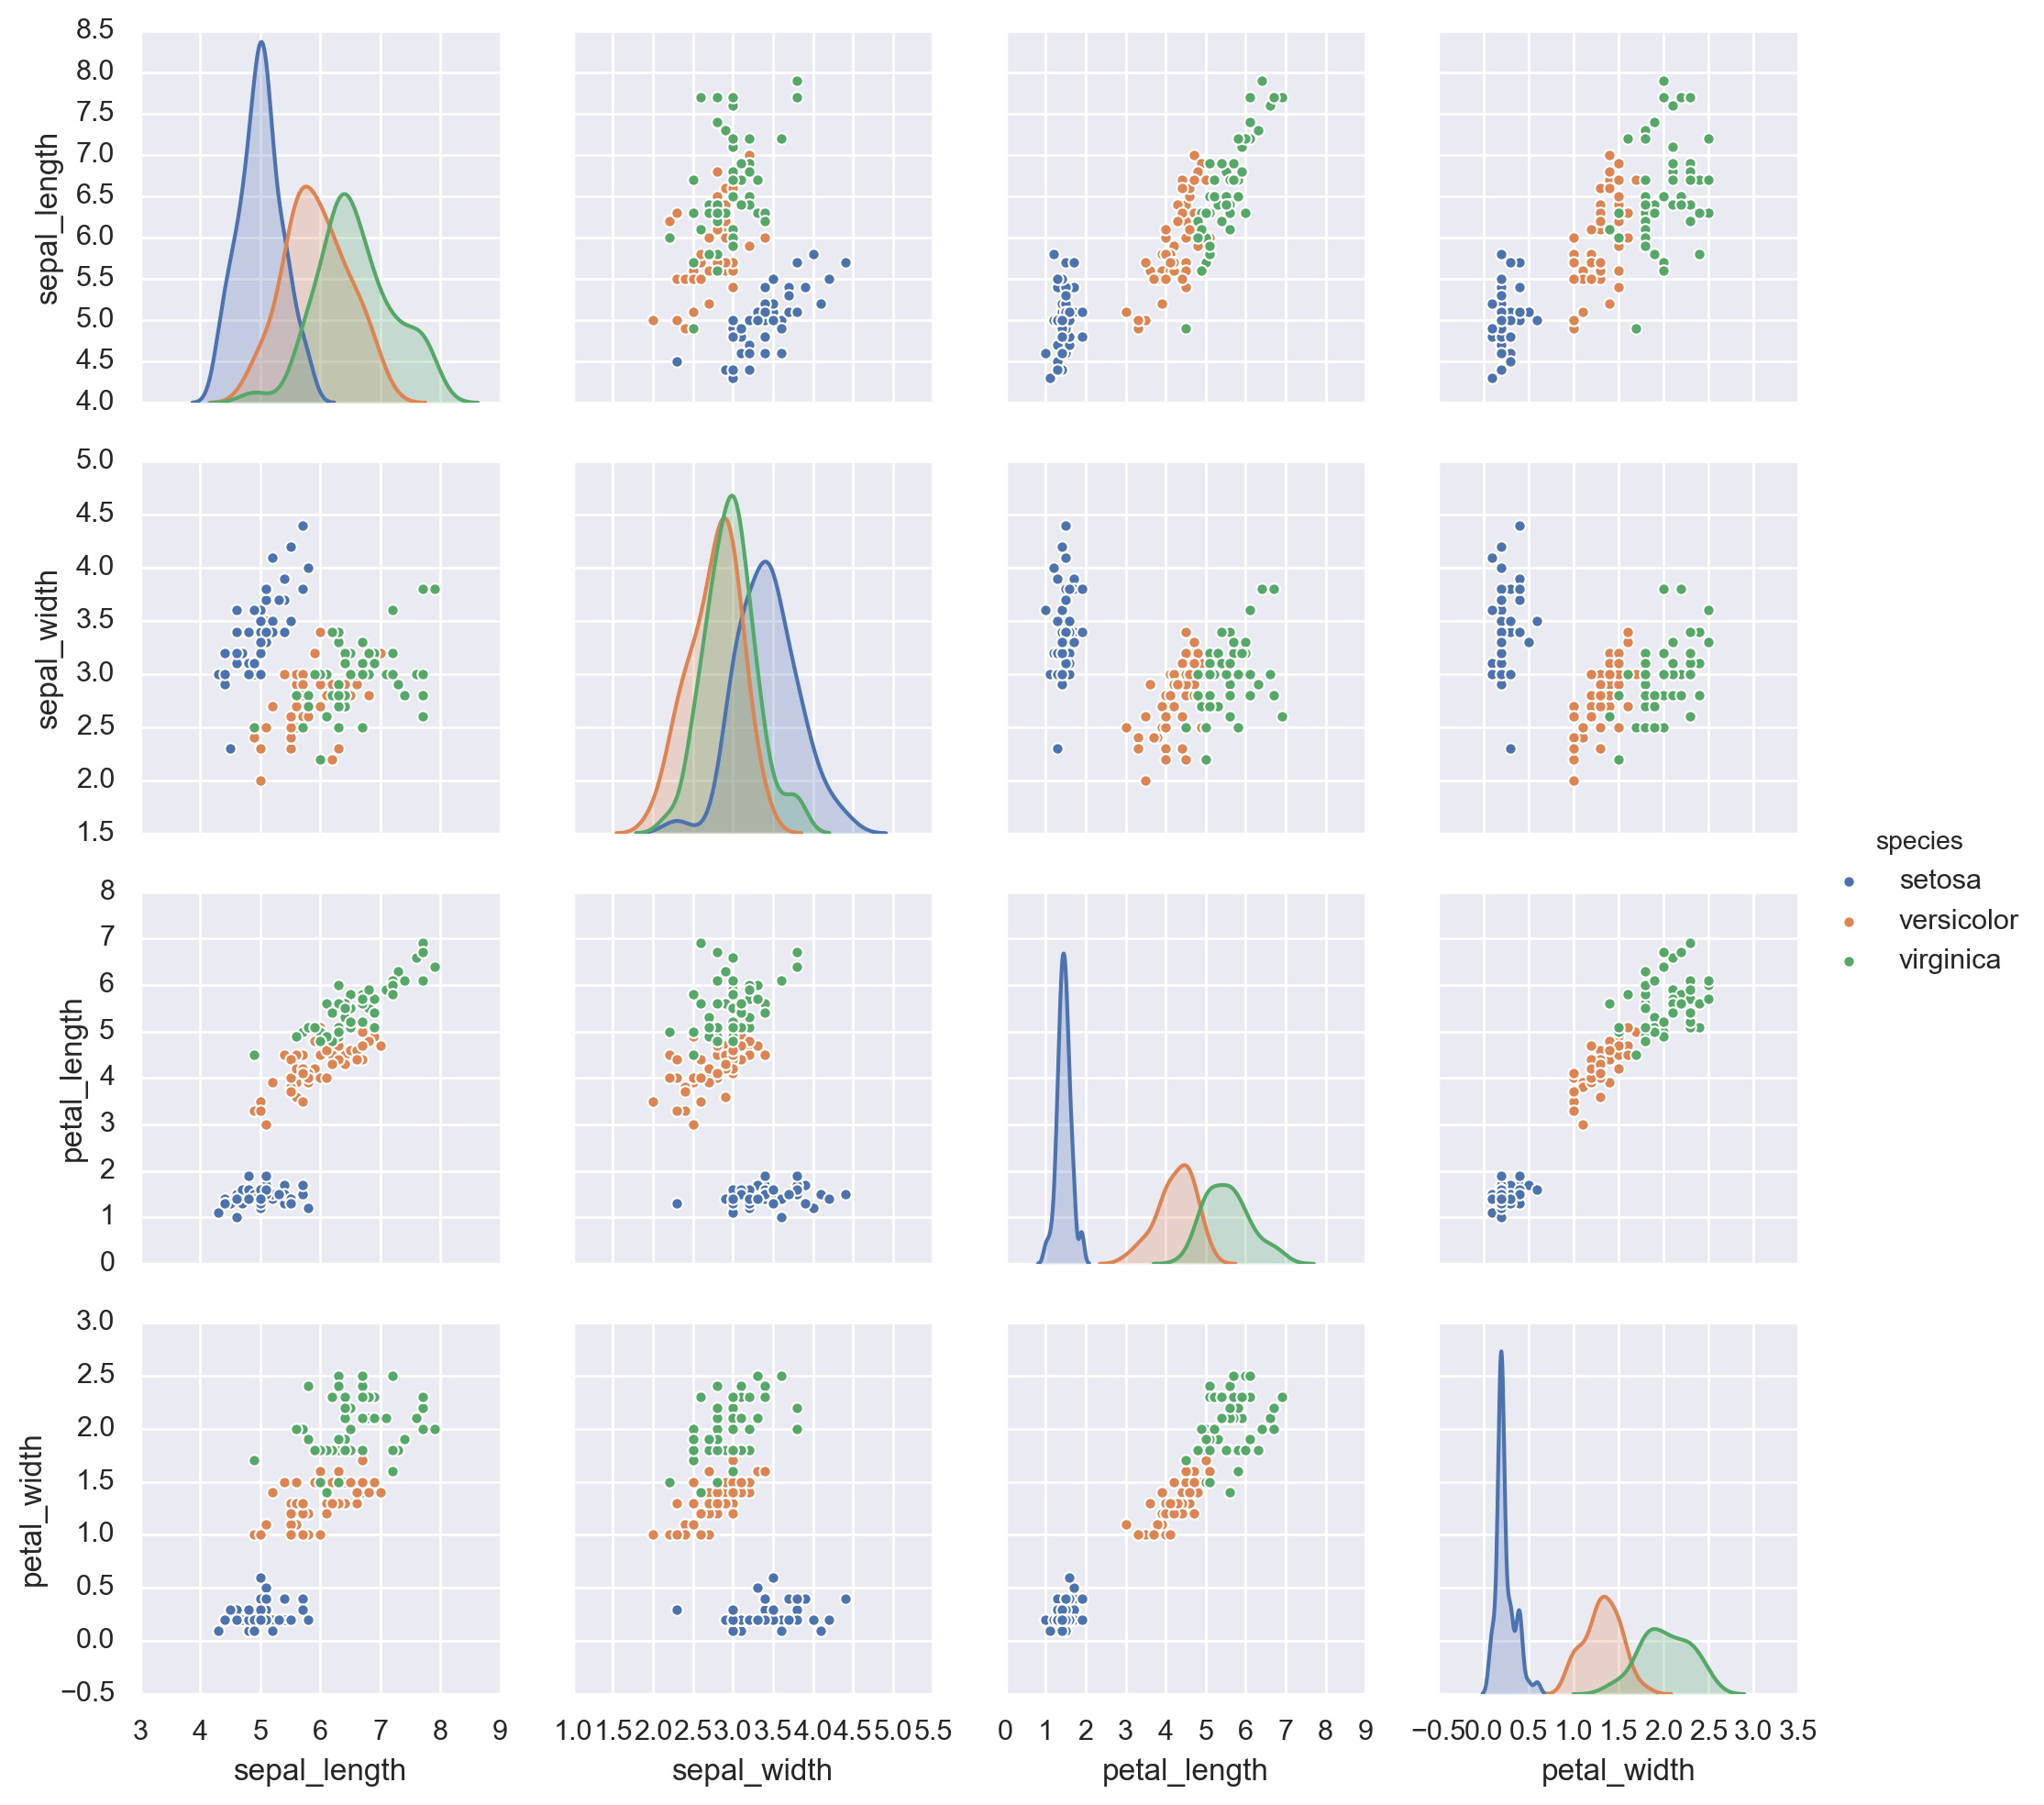

In [41]:
sns.pairplot(iris, hue='species', height=2.5)

### 案例：探索马拉松比赛成绩数据

In [42]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [44]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

把字符串转换成时间类型

In [50]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [51]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [56]:
data['split_sec'] = data['split'].astype('timedelta64[s]')
data['final_sec'] = data['final'].astype('timedelta64[s]')
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


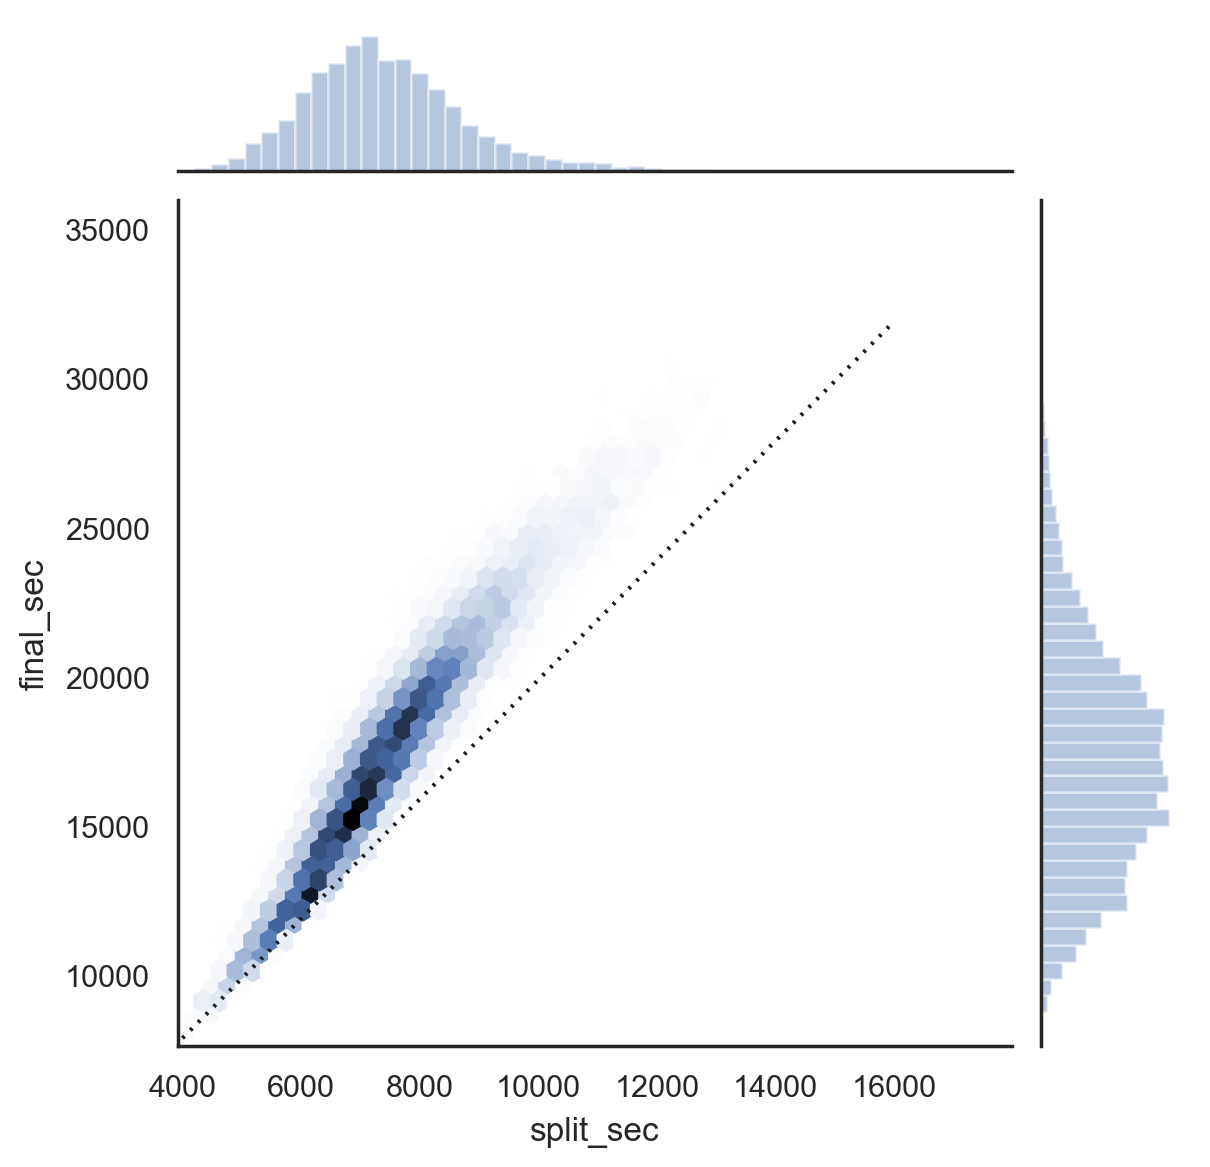

In [61]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k')

图中实点线代表：一个上半程与下半程保持同样速度。

创建一列分割数(split_frac)，表示前后半程的差异，衡量比赛选手后半程加速或前半程加速的层度。  
$split\_frac = 1 - 2*split_sec / final_sec$  
若$split\_frac = 0$,说明该选手上下半程保持速度一致  
若$split\_frac < 0$, 说明该选手下半程加速  
若$split\_frac > 0$, 说明该选手下半程减速  



In [63]:
data['split_frac'] = 1 - 2*data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


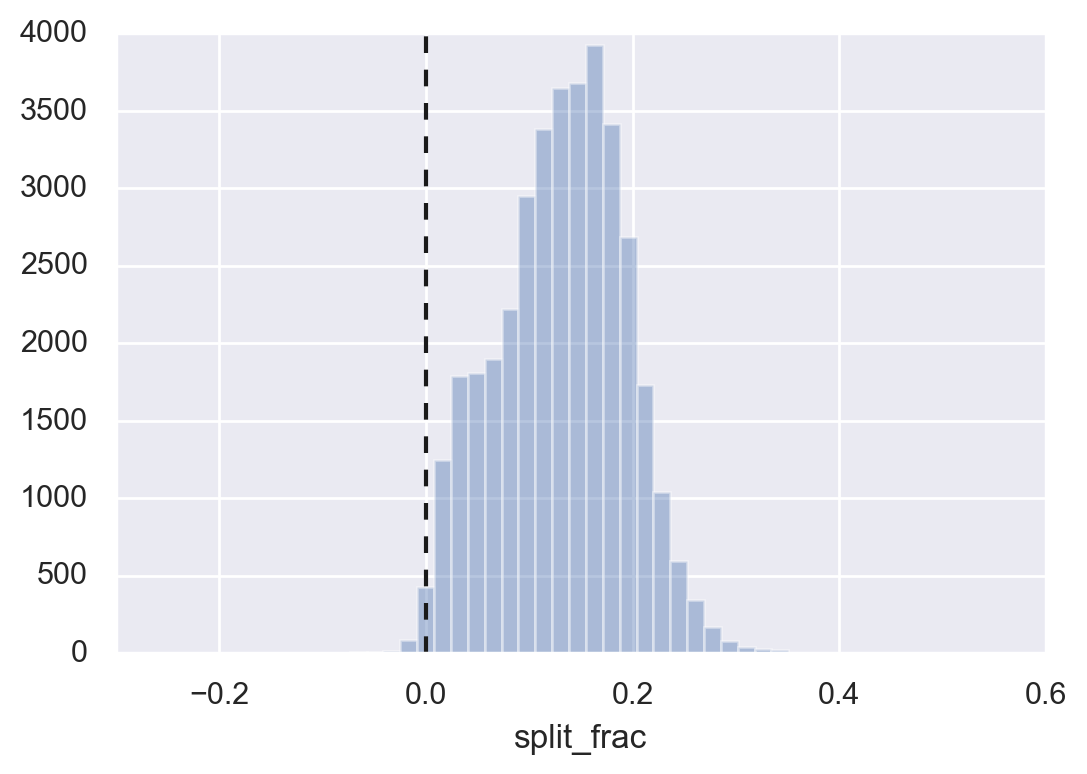

In [67]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')

In [71]:
sum(data.split_frac<0)

251

观察上下半程差异系数(split_frac)与其他变量的相关性。


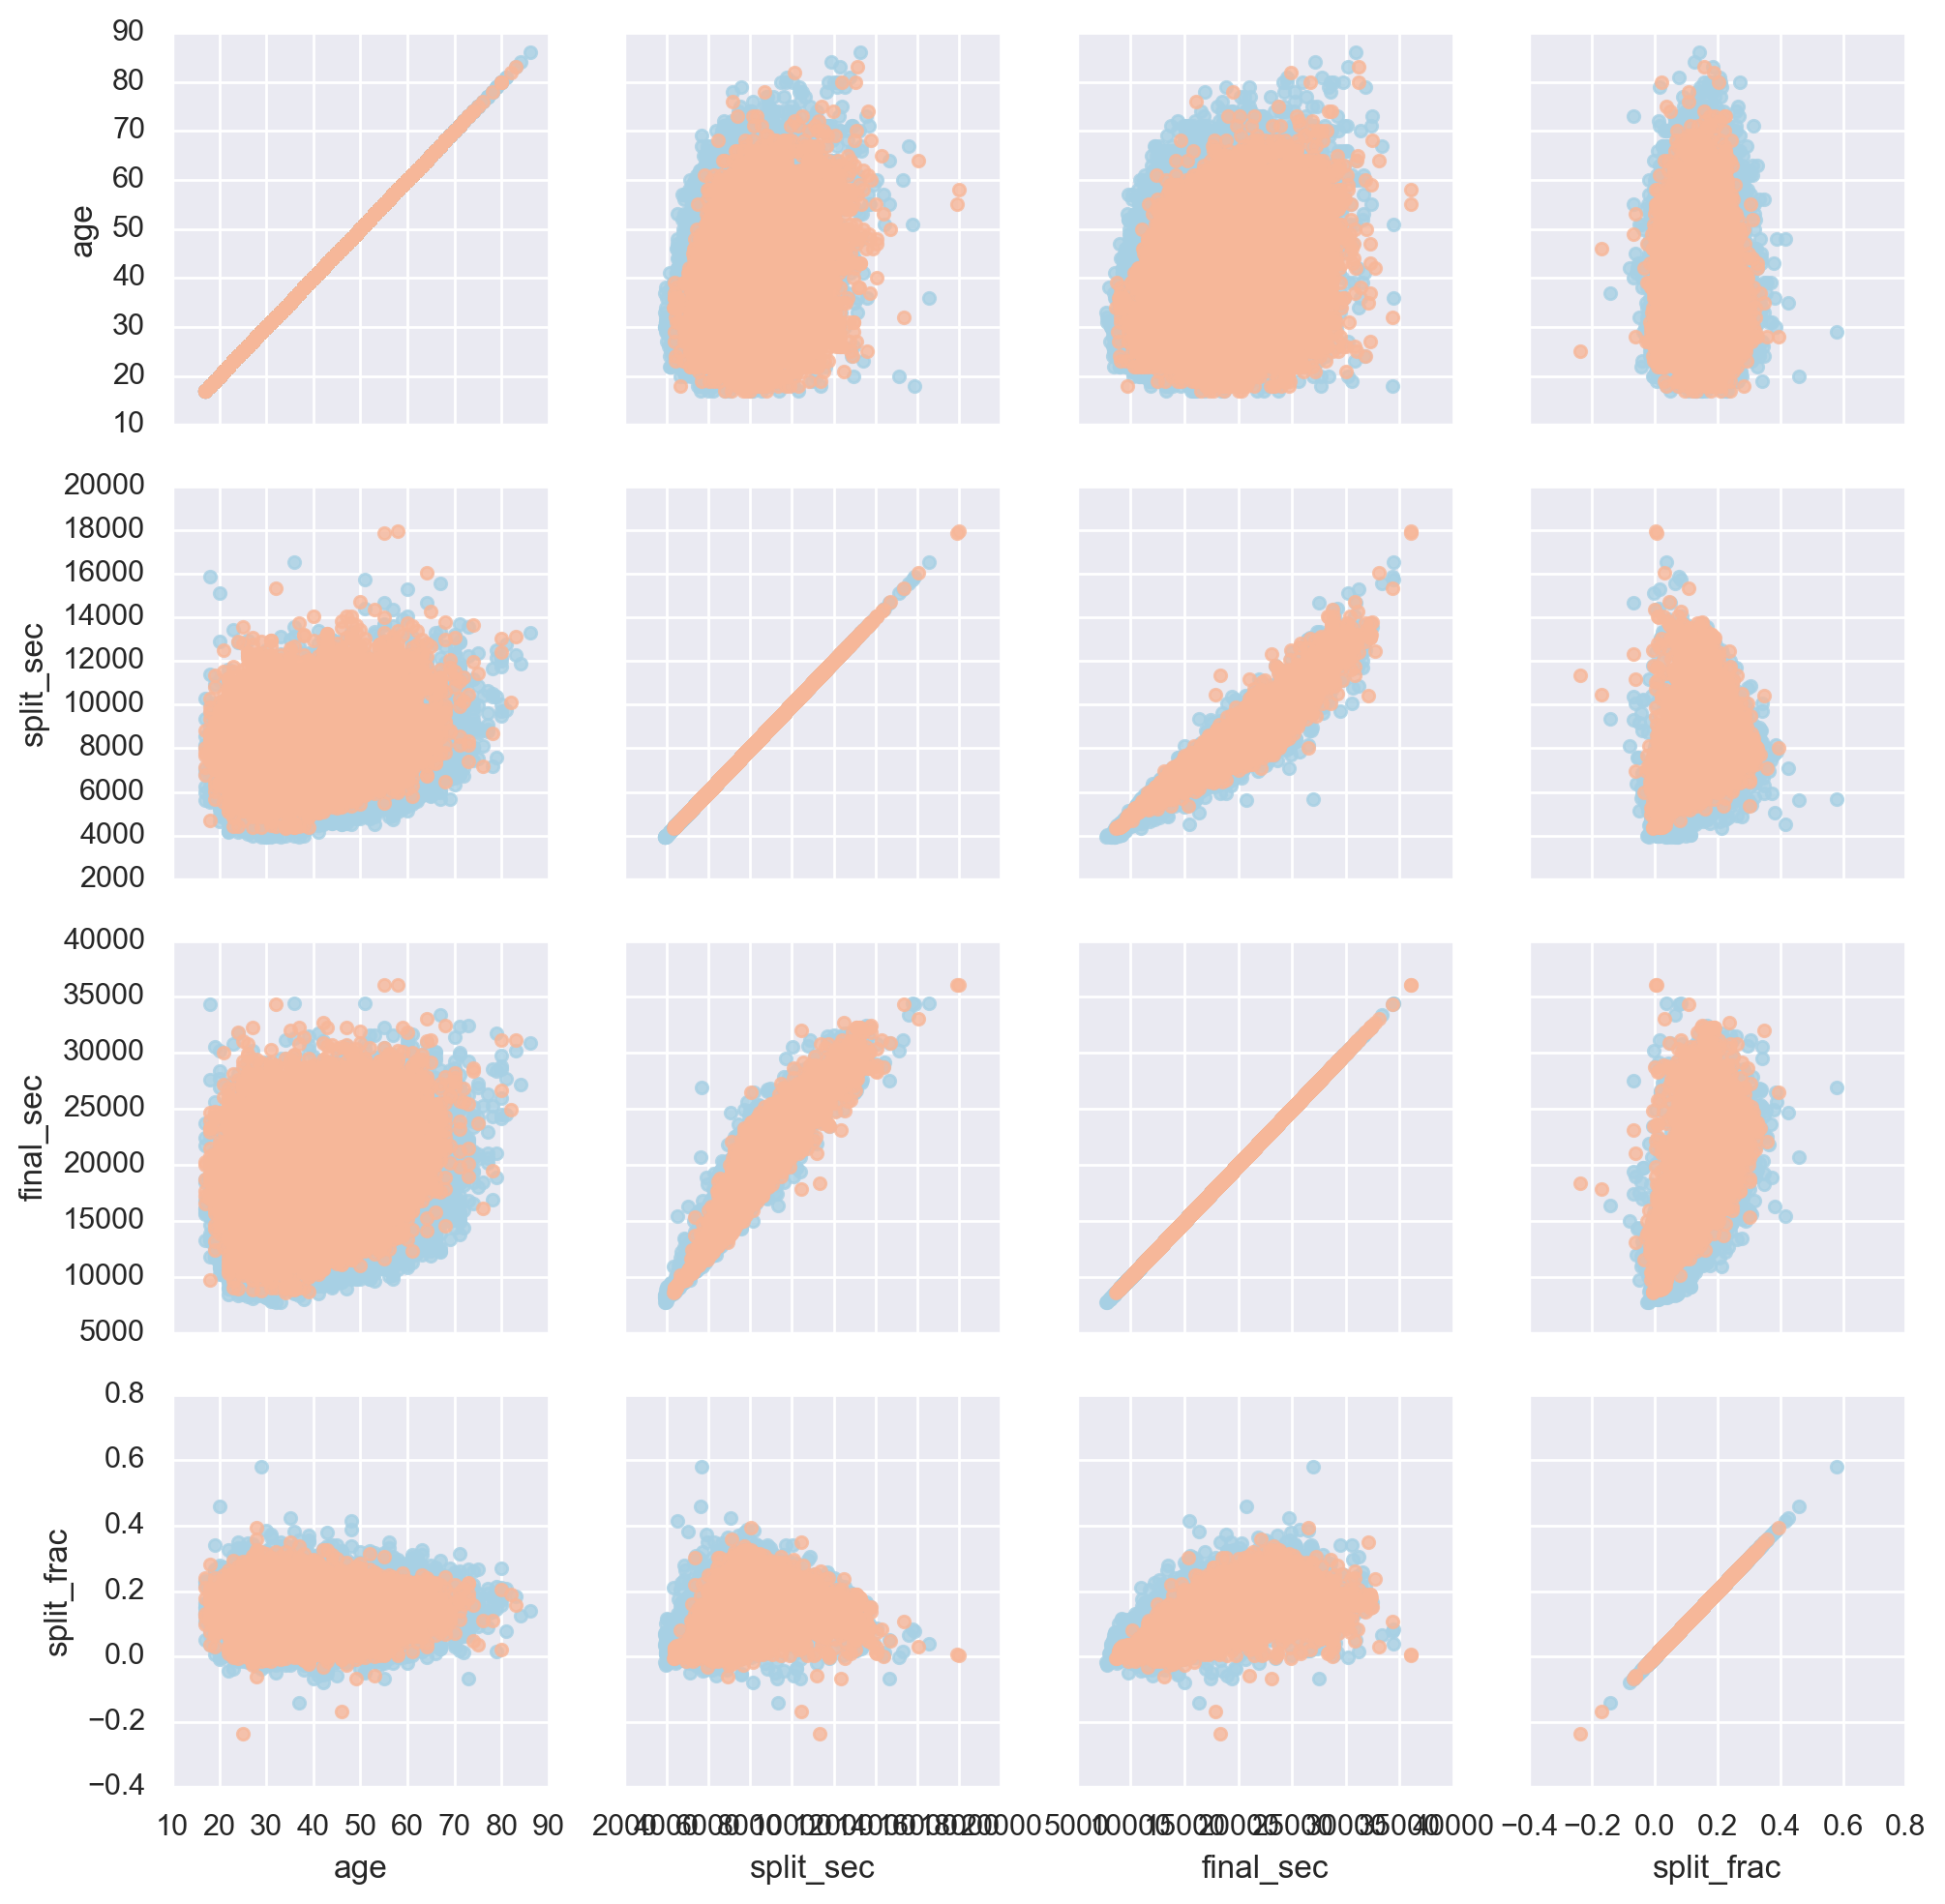

In [77]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

男女选手上下半程差异系数分布情况

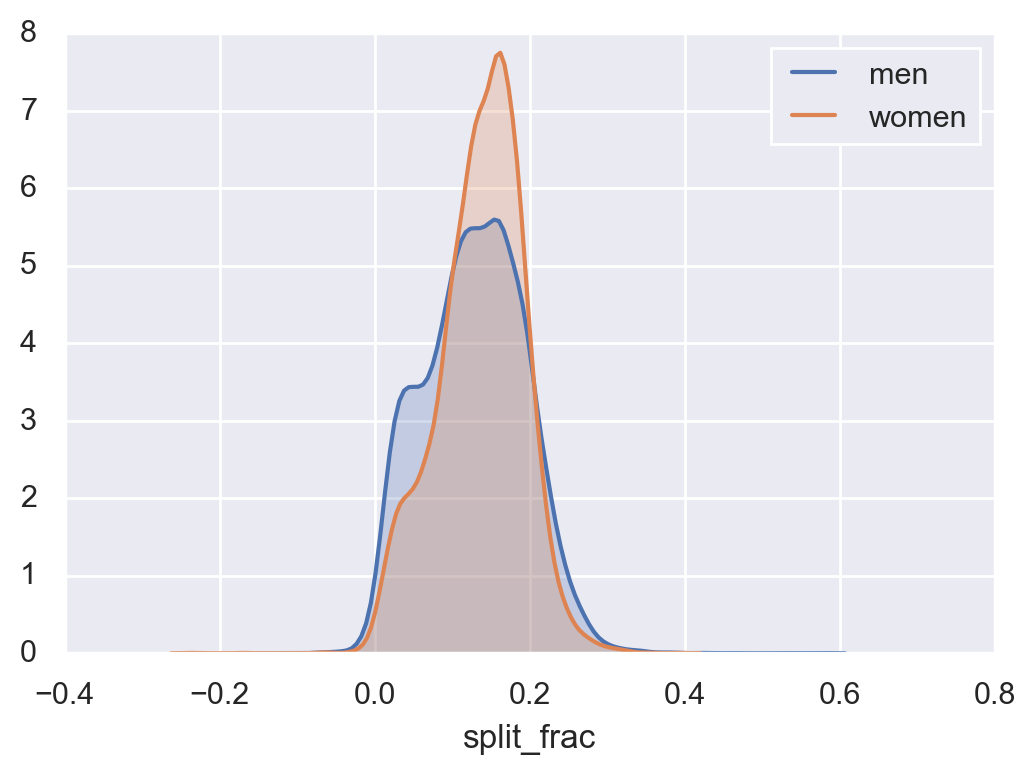

In [78]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

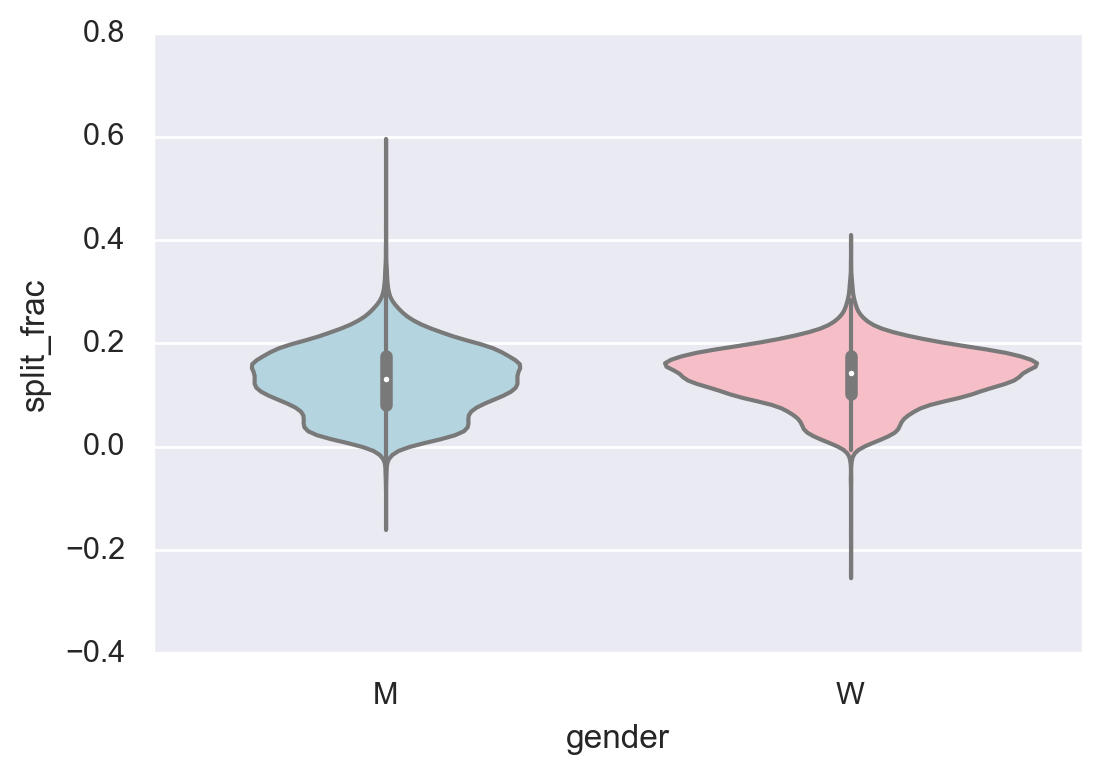

In [81]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [89]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

## 设置风格
`set()`
可选风格有：  
`darkgrid, whitegrid, dark, white, ticks`， 默认darkgrid

In [86]:
sns.set(style='ticks')
# 加载数据
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## lmplot(回归图)

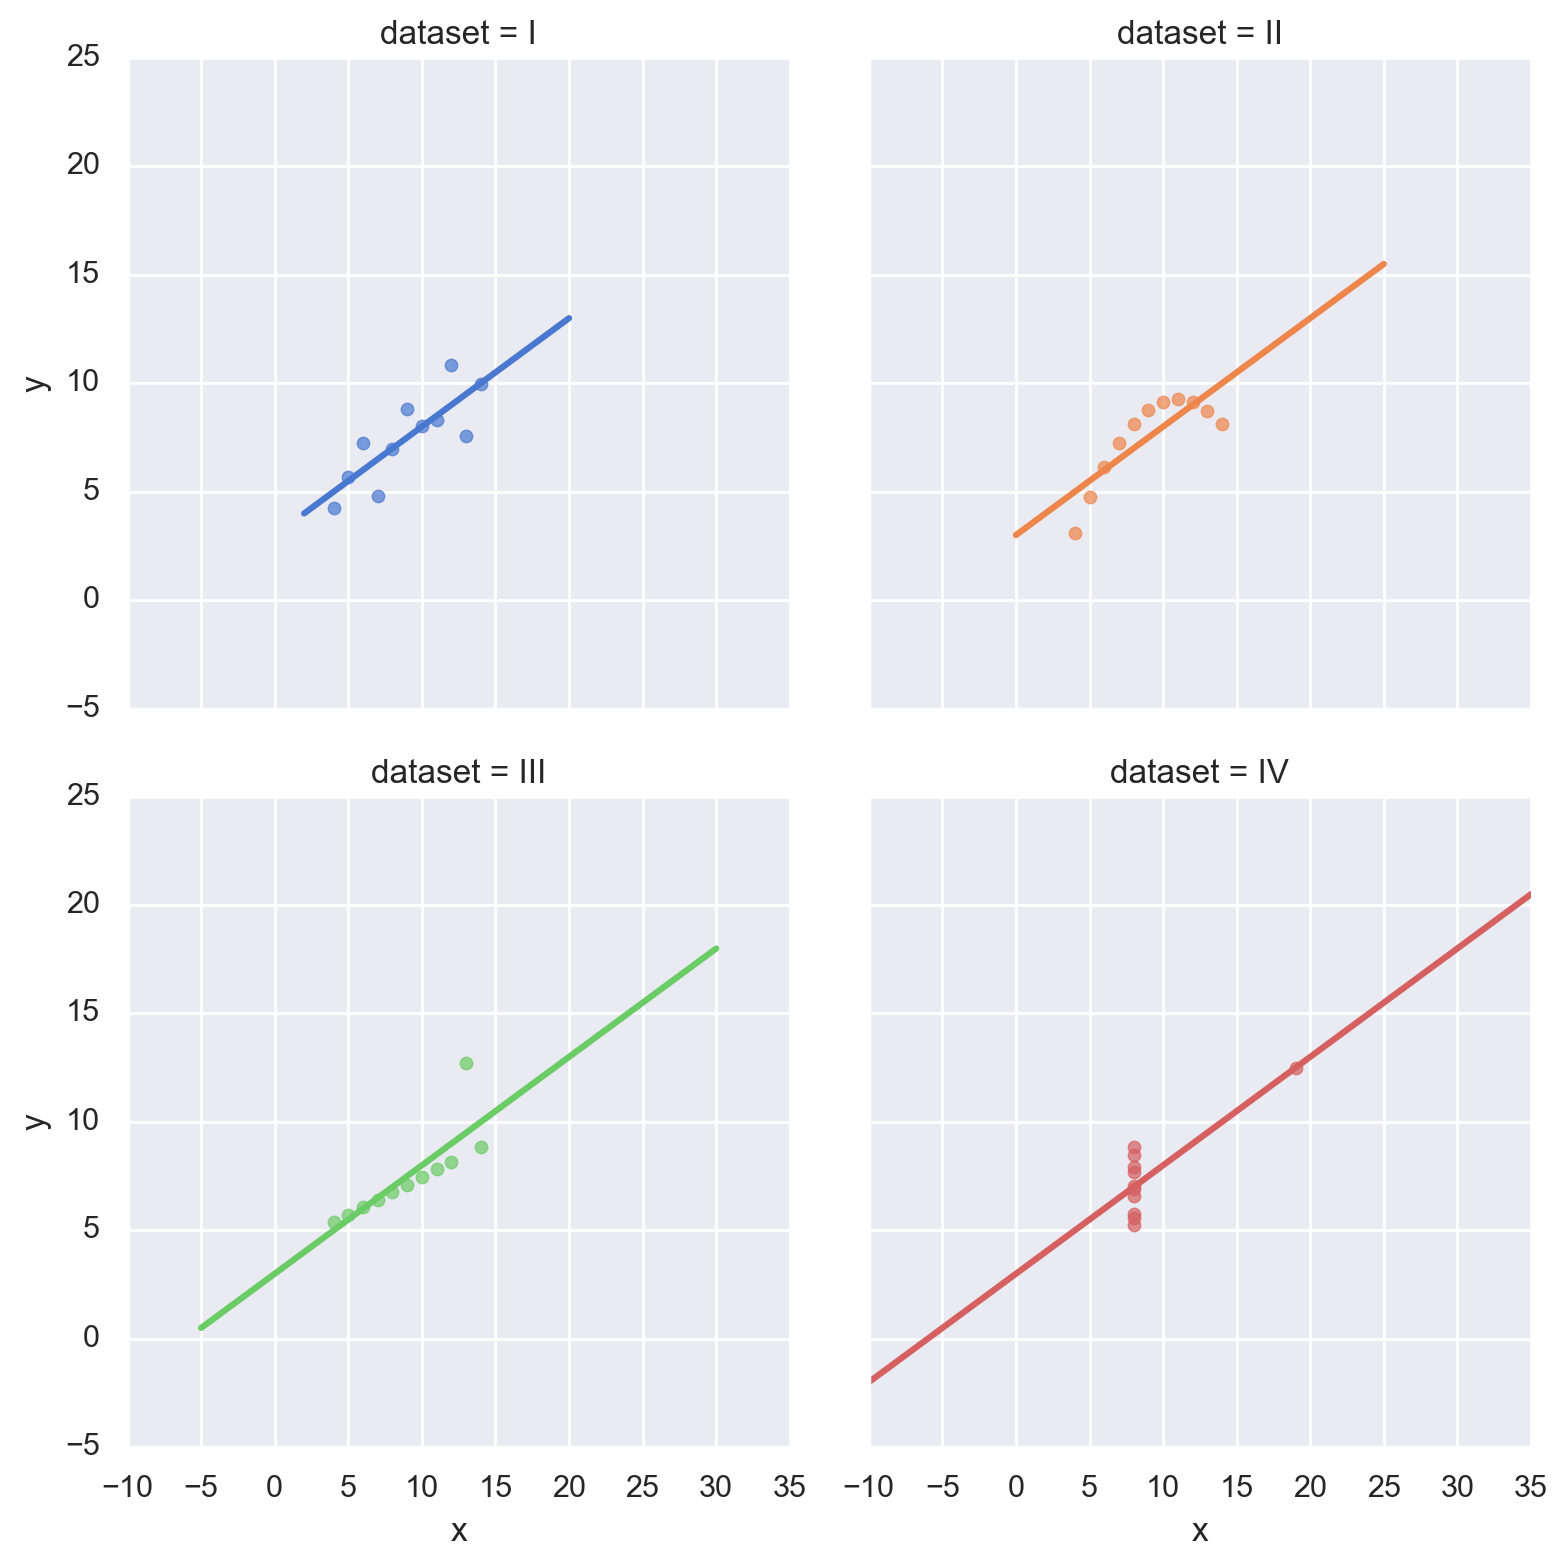

In [135]:
# 显示每个数据集的线性回归结果,xy变量,
# col定义数据子集变量,可以把它看作分类绘图依据，传入则将图形分为多子图
# hue定义数据子集变量,可以把它看作分类绘图依据
# data数据
# col_wap: 设置每列存放多少个图，与col一起使用
# ci置信区间,
# palette调色板
# height：每个坐标直接的距离
# scatter_kws由散点连线
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df,
          col_wrap=2, height=4, palette='muted',ci=None,
          scatter_kws={'s':20, 'alpha':0.7})
plt.show()

In [116]:
#多元线性回归 重置主题
sns.set()
# 加载iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


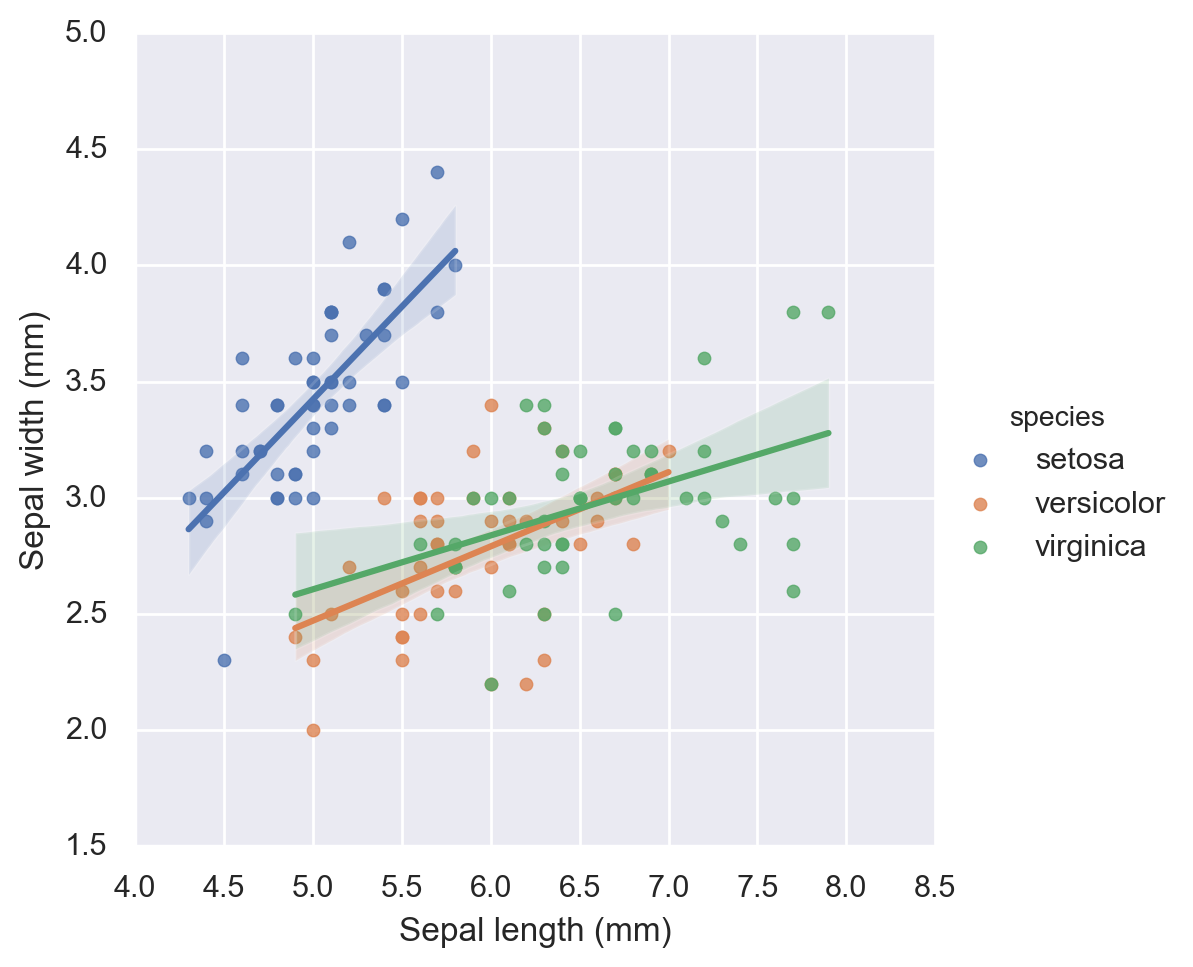

In [136]:
#hue定义数据子集变量,可以把它看作分类绘图依据,truncate回归线
# 默认情况下，绘制回归线以填充x轴限制。
# 在绘制散点图之后。如果“truncate”为“True”，则
# 而是以数据限制为界。
g = sns.lmplot(x='sepal_length', y='sepal_width', data=iris,
              hue='species', height=5, truncate=True)
# 使用自定义轴标签
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

In [137]:
# 设置主题风格
sns.set(style="darkgrid")
# 加载titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


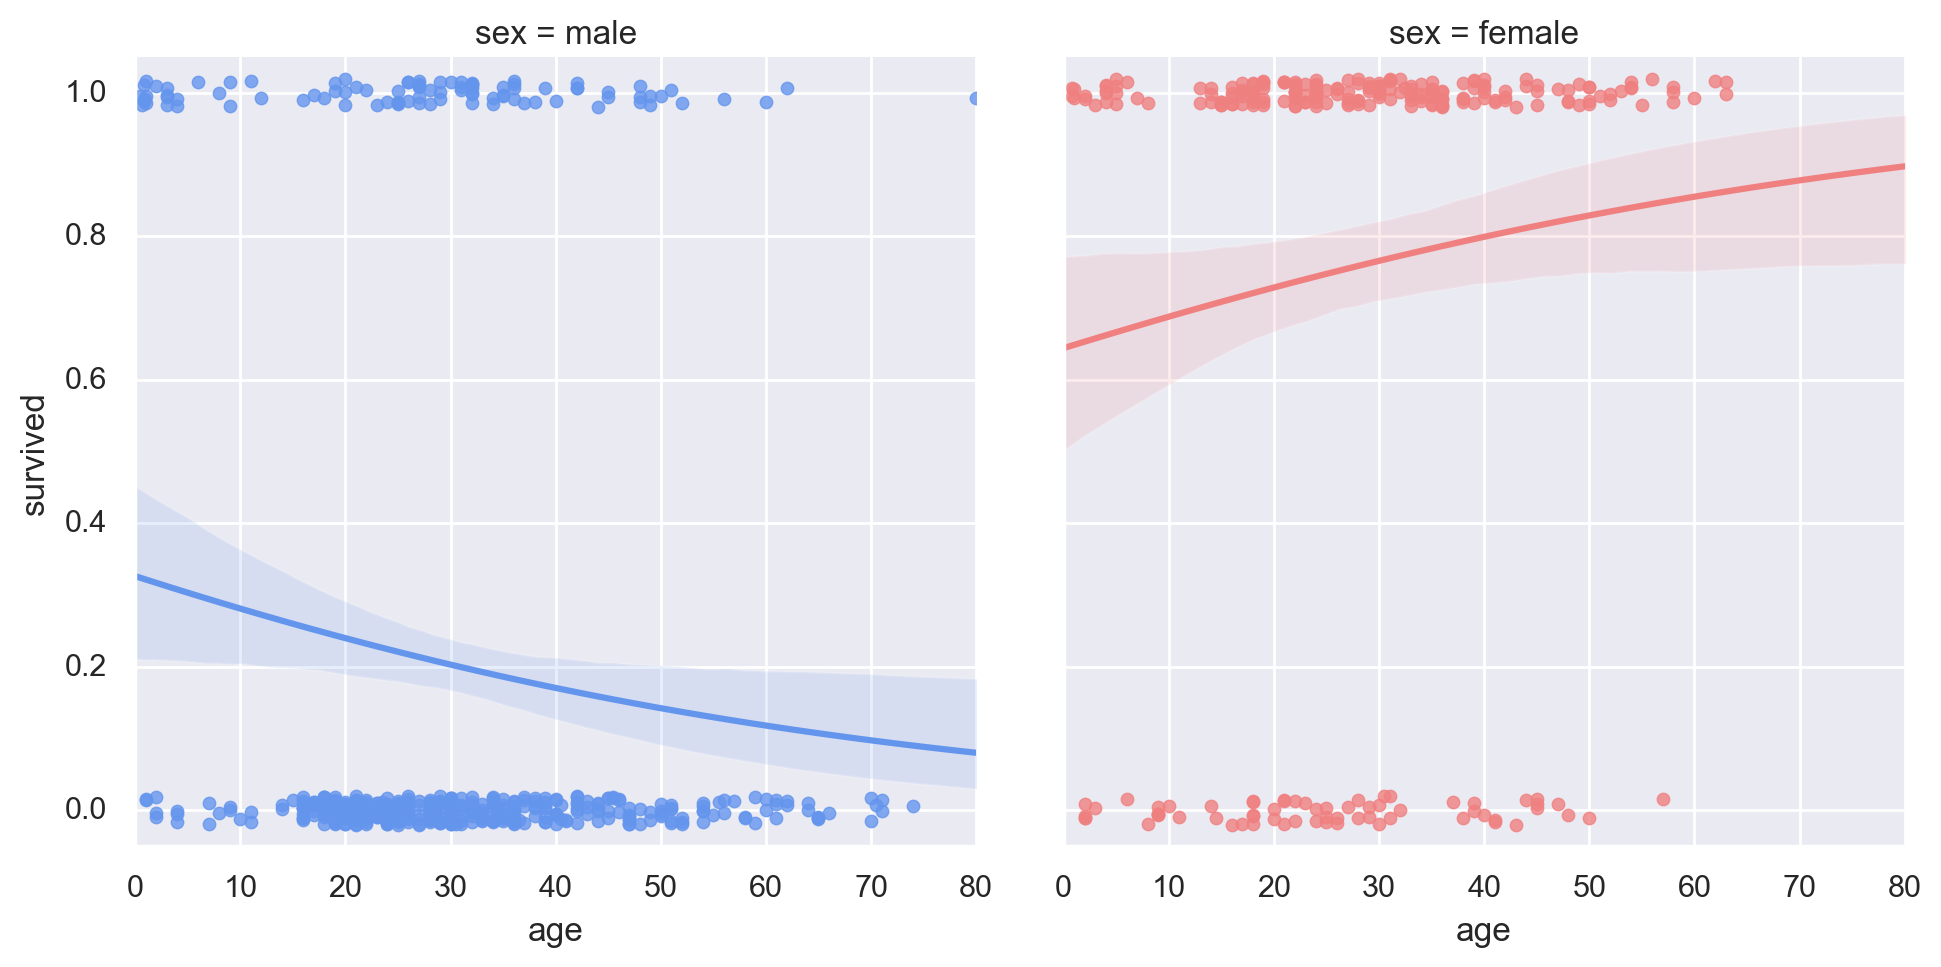

In [142]:
# 制作具有性别色彩的自定义调色板
pal = dict(male="#6495ED", female="#F08080")
# 生存概率如何随年龄和性别变化
# y_jitter回归噪声,logistic逻辑回归模型
g = sns.lmplot(x='age', y='survived', col='sex', hue='sex',
              data=df, palette=pal, y_jitter=.02, logistic=True)

g.set(xlim=(0, 80), ylim=(-0.05, 1.05))

## kdeplot(核密度估计图)

核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：

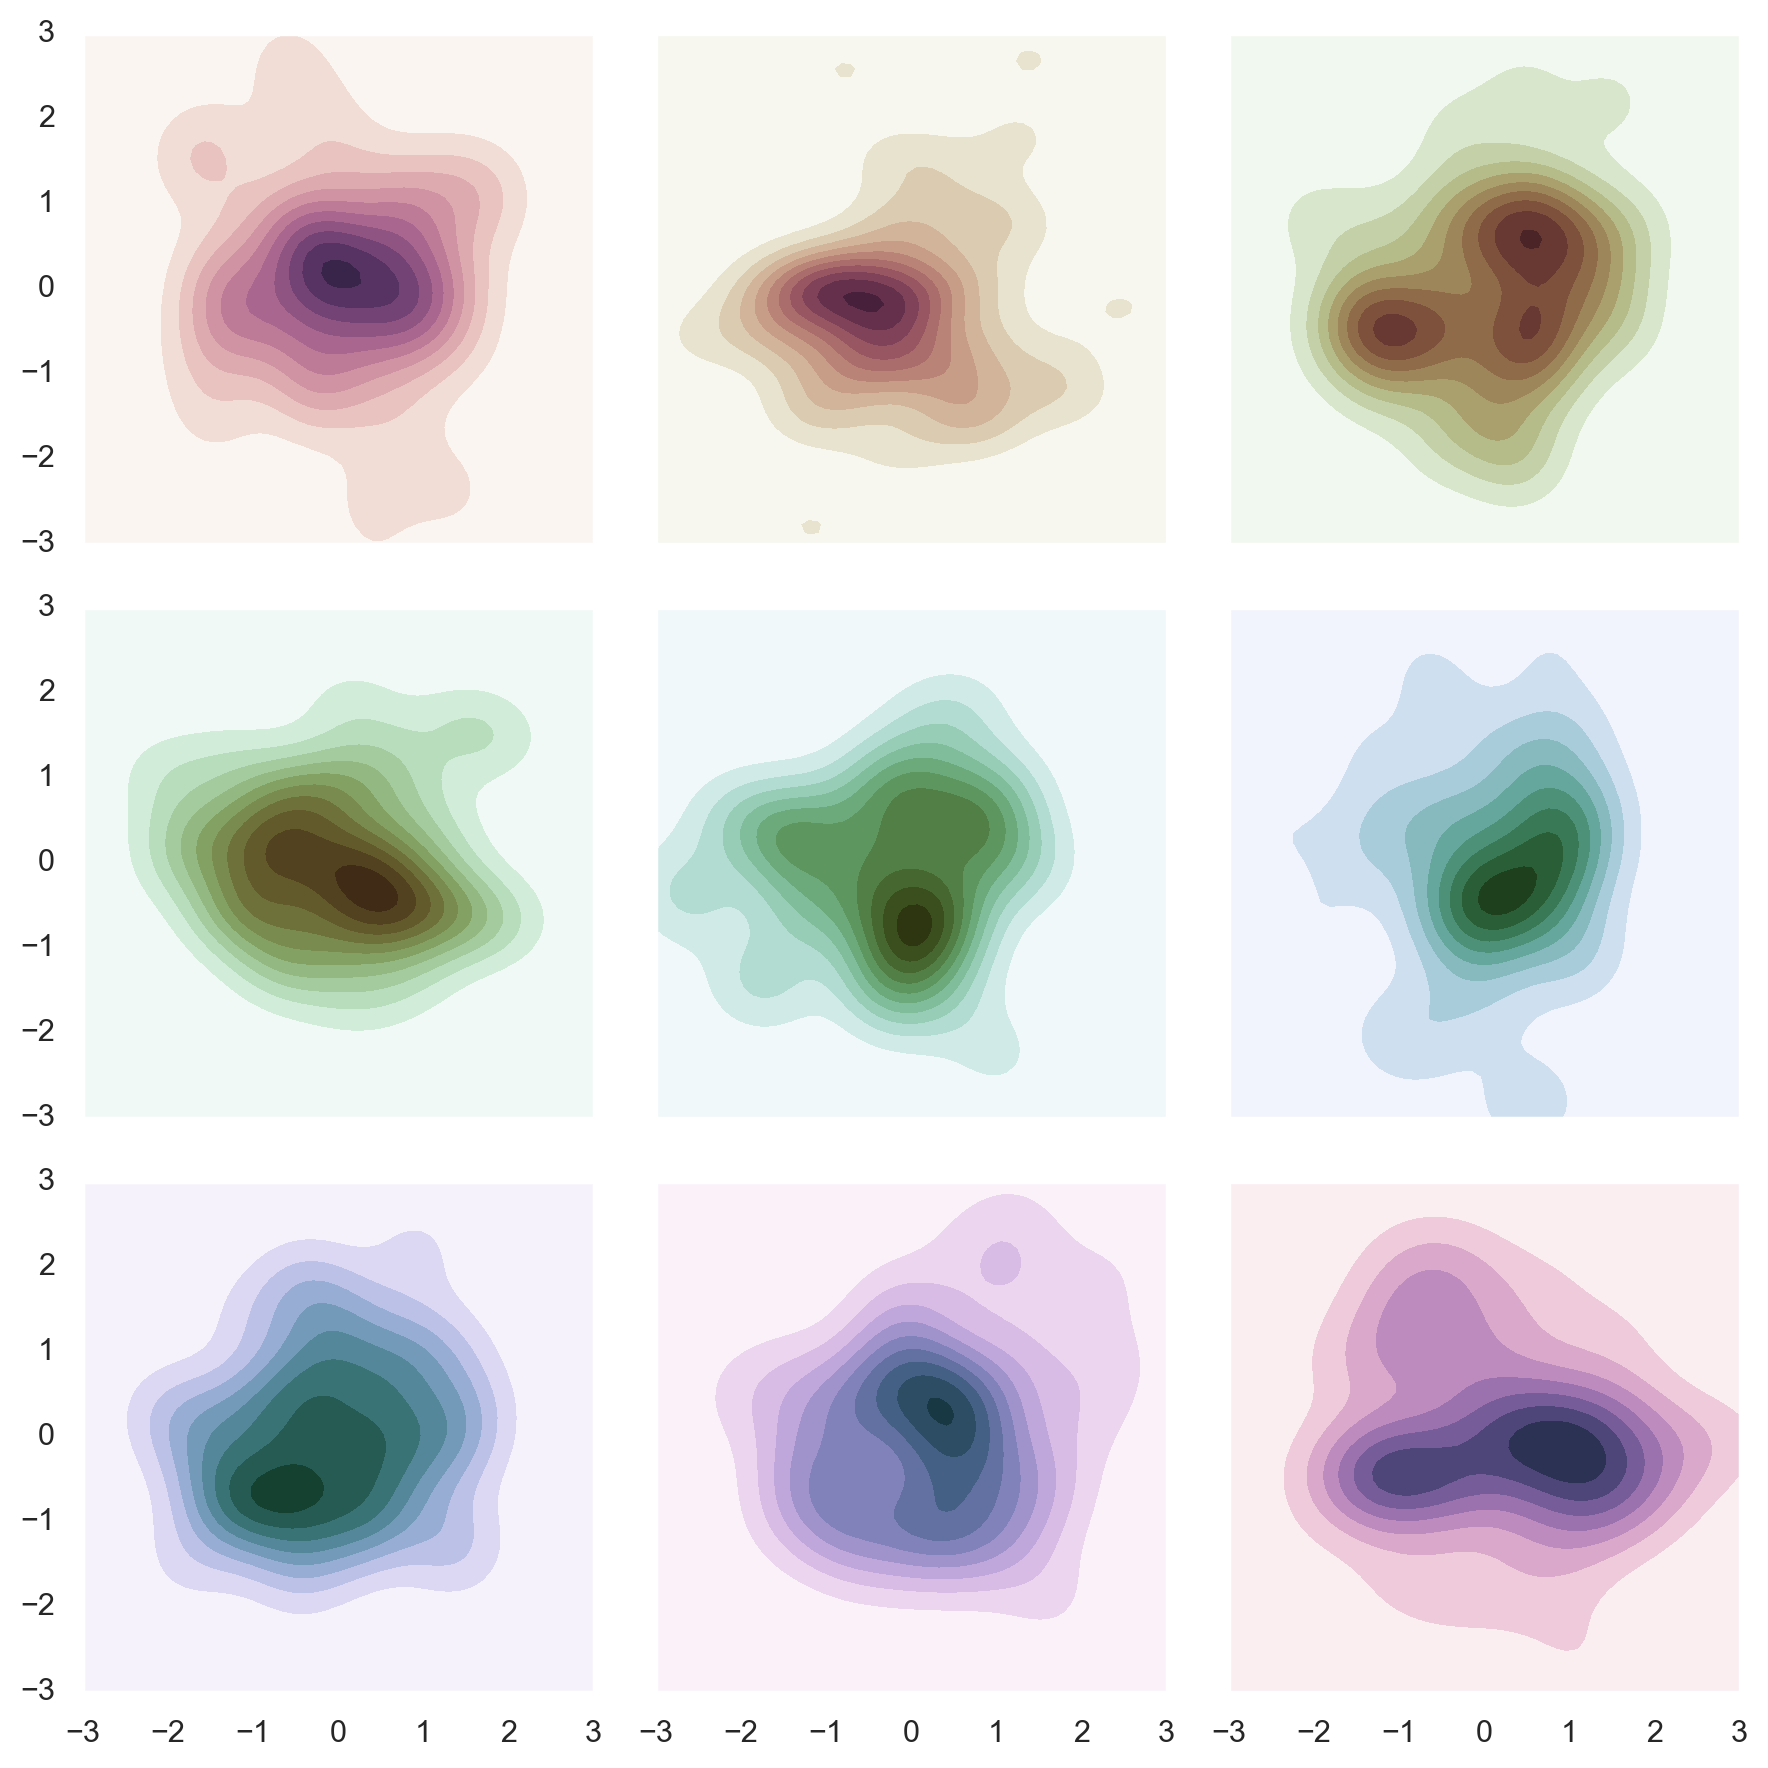

In [143]:
sns.set(style="dark")
#生成随机种子
rs = np.random.RandomState(50)
# 设置matplotlib图 共享坐标轴
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):
    # 创键调色板图
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
    # 生成并绘制随机双变量数据集,shade设置阴影,cut限制曲线
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))
f.tight_layout()

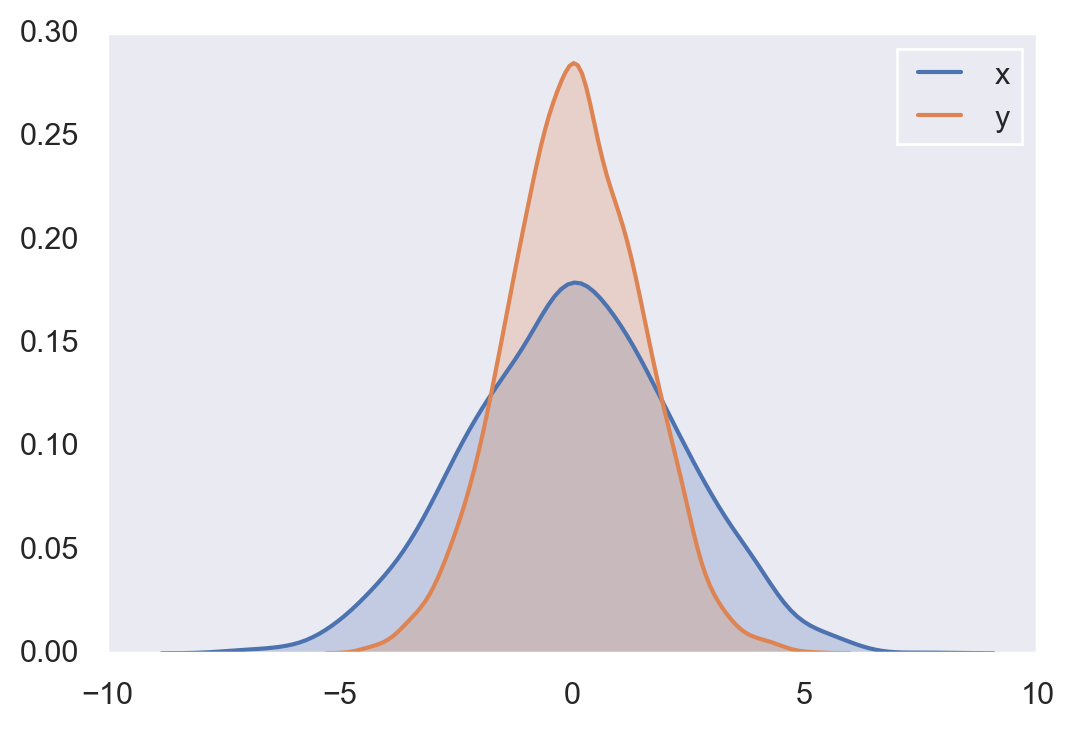

In [145]:
data = np.random.multivariate_normal([0, 0], [[5,2], [2,2]], size=3000)
data = pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    sns.kdeplot(data[col], shade=True)
plt.show()

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

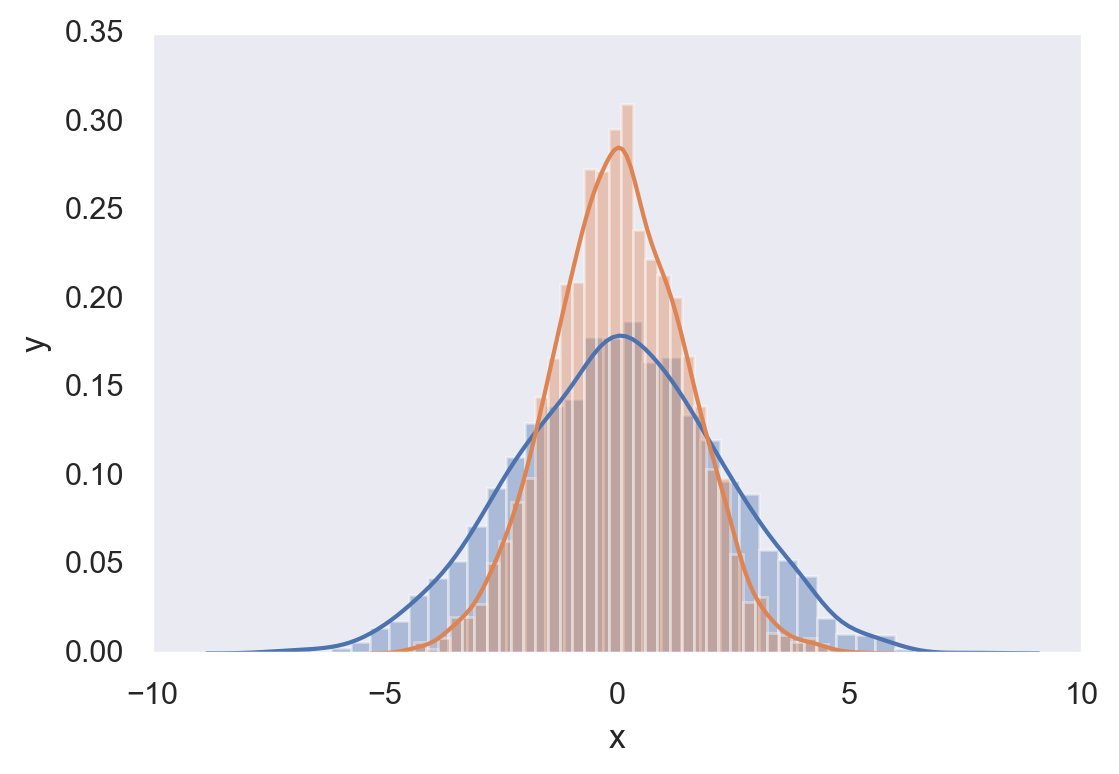

In [155]:
sns.distplot(data['x'])
d = sns.distplot(data['y'])
d.set(xlabel='x', ylabel='y')

## FacetGrid
分类画图

是一个绘制多个图表（以网格形式显示）的接口。
步骤：  
1. 实例化对象
2. map，映射到具体的 seaborn 图表类型
3. 添加图例

In [156]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


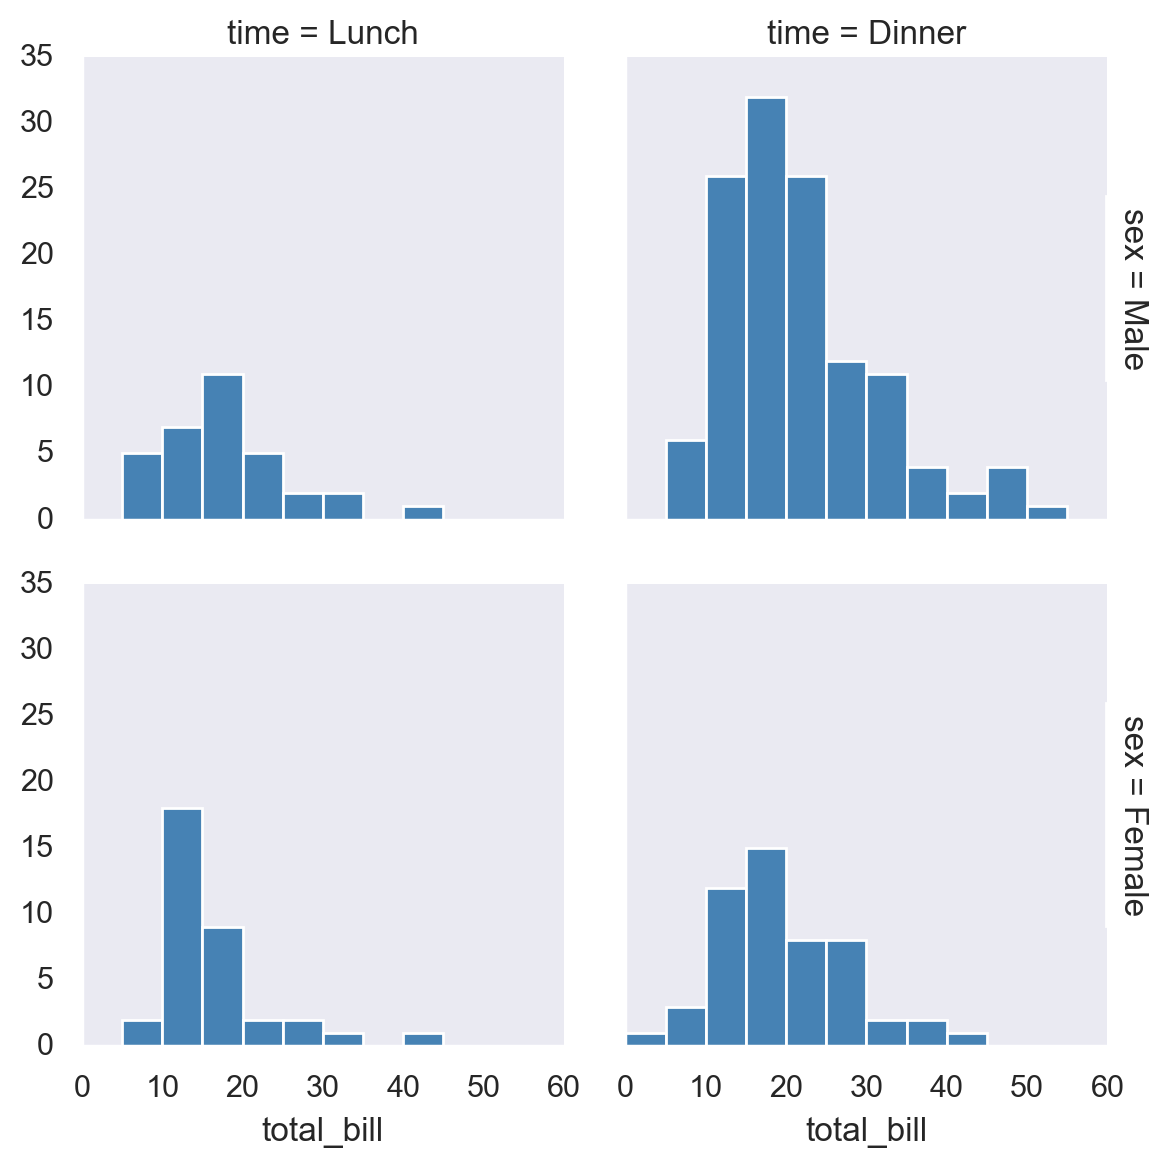

In [161]:
# row行设置,margin_titles边缘标题,bins直方图参数分段
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'total_bill', color='steelblue', bins=bins)

## distplot(单变量分布直方图)

在seaborn中想要对单变量分布进行快速了解最方便的就是使用distplot()函数，默认情况下它将绘制一个直方图，并且可以同时画出核密度估计(KDE)。

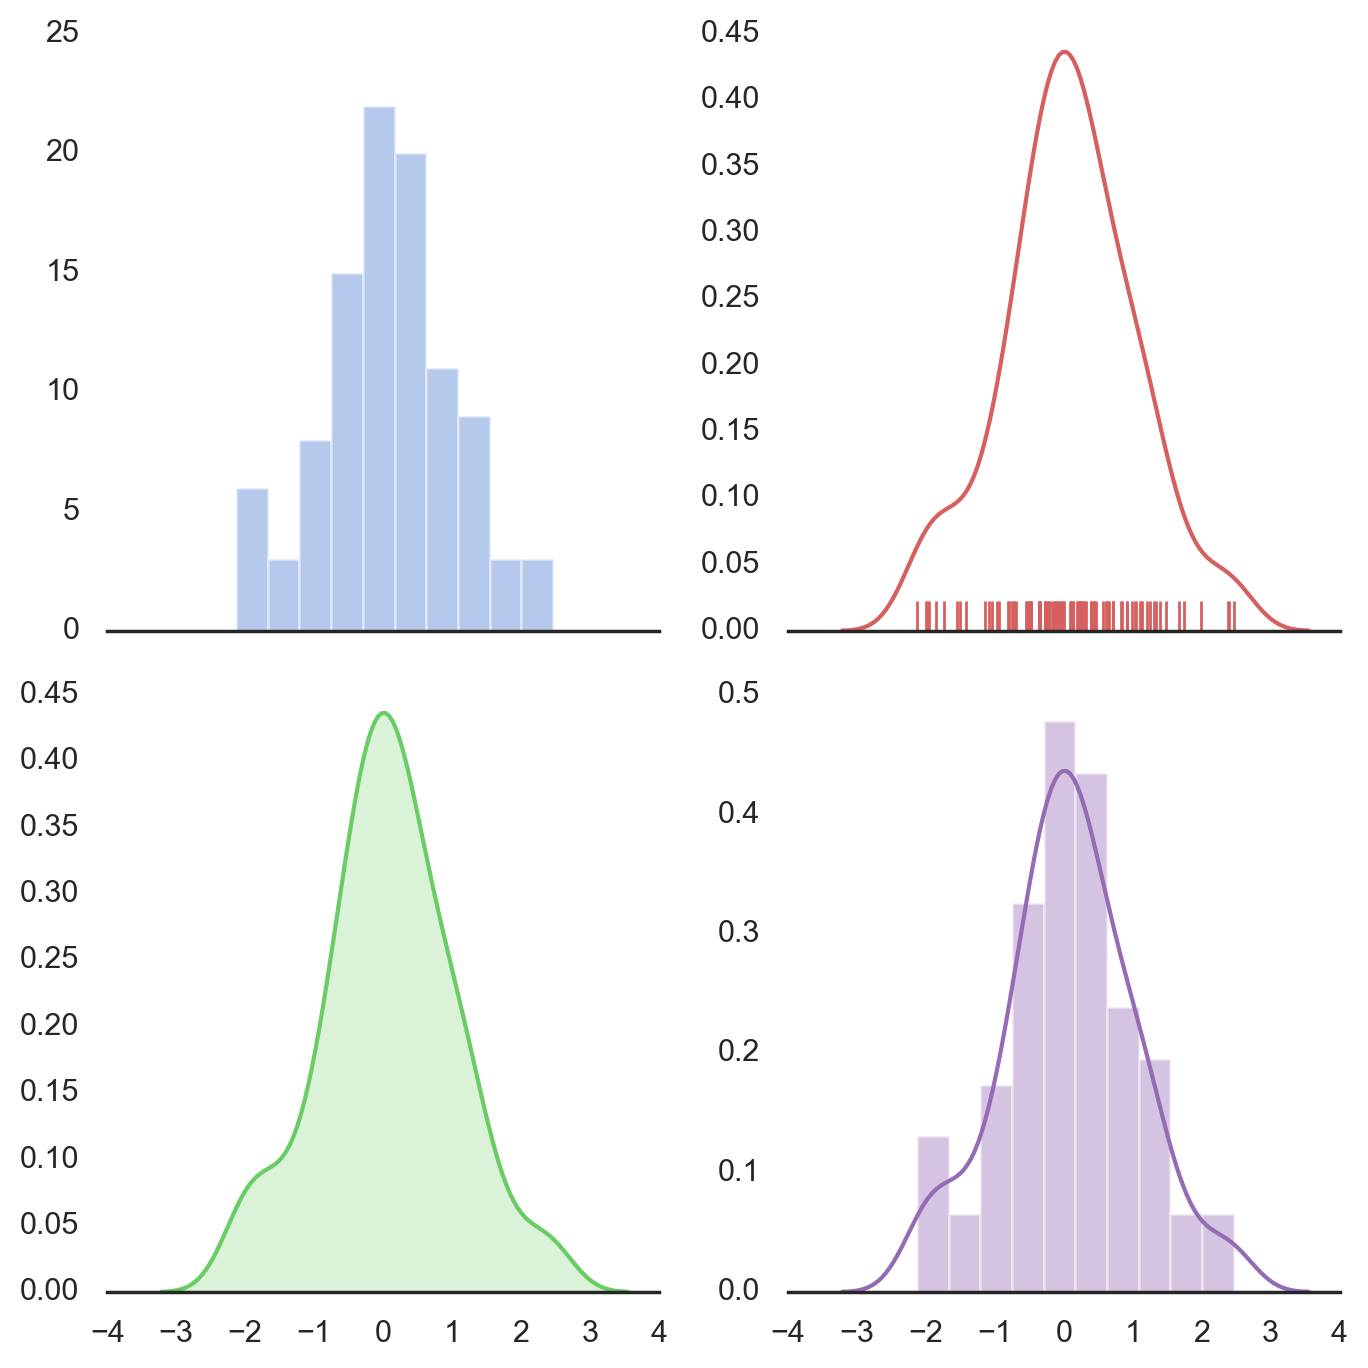

In [179]:
sns.set(style='white', palette='muted', color_codes=True)
rs = np.random.RandomState(10)
# 设置matplotlib图
f, axes = plt.subplots(2,2, figsize=(7,7), sharex=True)
# 把图形的某些坐标线去掉(默认right， top)
sns.despine(left=True)
# 生成随机数据
d = rs.normal(size=100)
#kde=False不绘制核密度图,ax第一个图,坐标左上
sns.distplot(d, kde=False, color='b', ax=axes[0,0])
# 不绘制直方图即绘制核密度图,rug在轴上画凹槽
sns.distplot(d, hist=False, color='r', ax=axes[0,1], rug=True)
# 绘制核密度图,设置阴影
sns.distplot(d, hist=False, kde=True, color='g',
             ax=axes[1,0], kde_kws={'shade':True})
# 绘制核密度图直方图
sns.distplot(d, color='m', ax=axes[1,1])
plt.tight_layout()

## lineplot(直线图)

seaborn里的lineplot函数所传数据必须为一个pandas数组.

In [180]:
# 加载数据
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


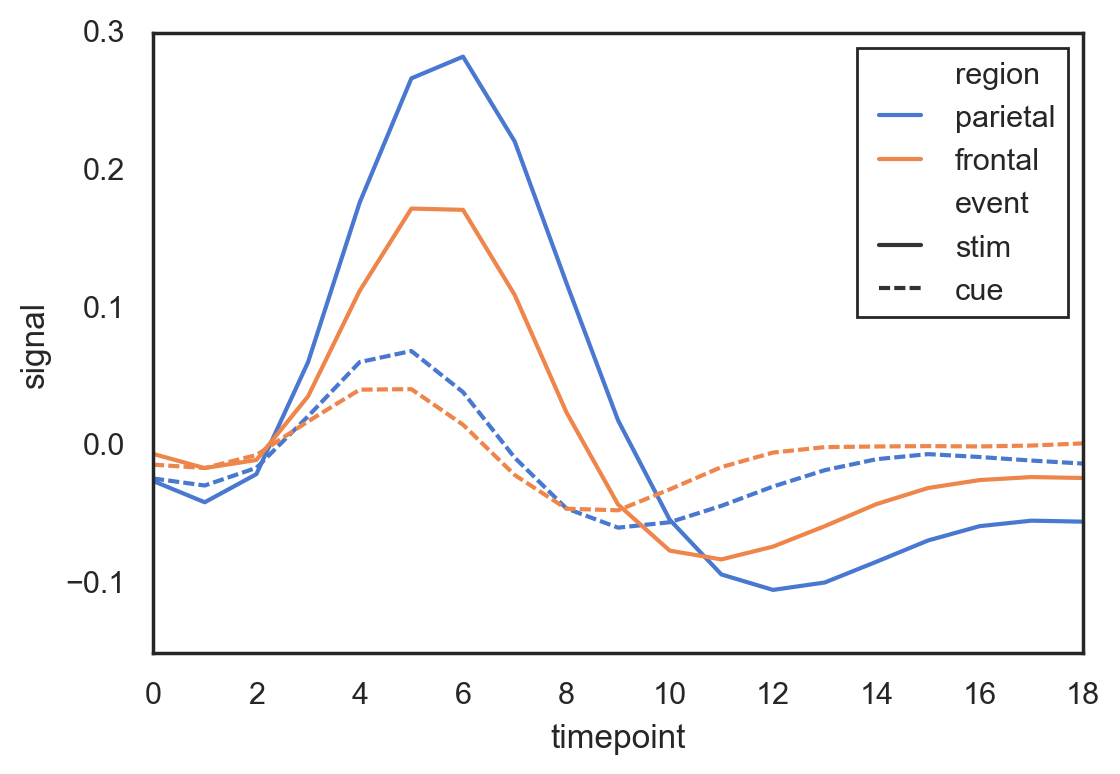

In [184]:
sns.lineplot(x='timepoint', y='signal', hue='region',
             data=fmri, style='event', ci=None)